In [1]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from os.path import split, splitext, join

from scipy import interpolate
from scipy.fft import fftfreq, fft

from sklearn import linear_model
from scipy import signal
from sklearn import linear_model



In [27]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
def find_nearest(array, value):
    idx = (np.abs(array-value)).argmin()
    return idx

In [58]:
folder_path = 'scripts/2.out'
no_of_stos = 2**2

df = pd.read_csv(join(folder_path, 'table.txt'),sep='\t')
t0 = df['# t (s)'].to_numpy()
current = split(splitext(folder_path)[0])[1]
magnetizations = []
for i in range(1, no_of_stos+1):
    magnetizations.append(df['m.region{}y ()'.format(i)].to_numpy())




In [85]:
t_new = np.arange(700e-9, 1.32e-5, 1e-9)

mag_new = []

for i in range(no_of_stos):
    f = interpolate.interp1d(t0, magnetizations[i])
    mag_new_ = f(t_new)
    mag_new.append(mag_new_)

t = t_new
mag0 = mag_new
mag = np.array(mag0)



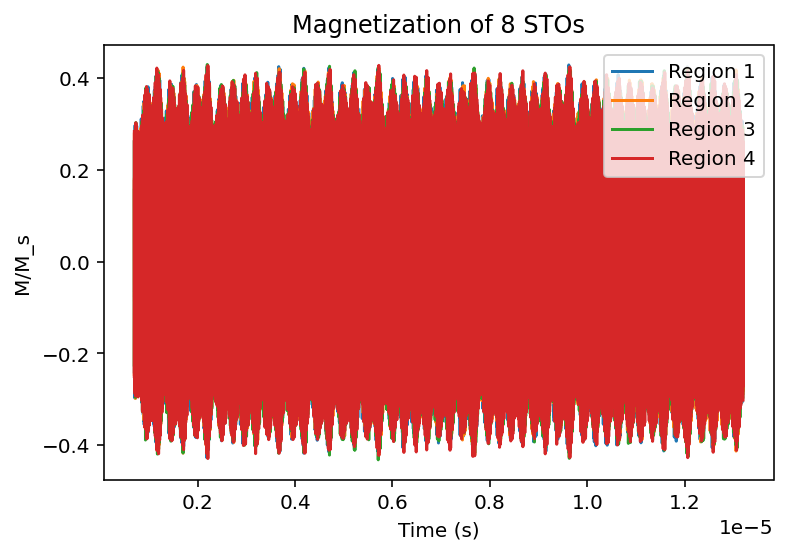

In [86]:
for i in range(len(mag0)):
    plt.plot(t, mag0[i], label=f'Region {i+1}')
plt.legend(loc='upper right')
# plt.xlim(400e-9, 7000e-9)
plt.title('Magnetization of 8 STOs')
plt.ylabel('M/M_s')
plt.xlabel('Time (s)')
plt.show()

In [87]:
def average_each_interval(mag, step_every5ns):
    mag_ = []
    
    for i in range(len(mag)):
        mag_i_ = mag[i].reshape(-1, step_every5ns).mean(axis=1)
        
        mag_.append(mag_i_)
        
    return np.array(mag_)

In [88]:
mackey_glass0 = np.load('mackey_glass_t17.npy')
print(mackey_glass0.shape)

(10000,)


In [89]:
mackey_glass = mackey_glass0[0:2500]

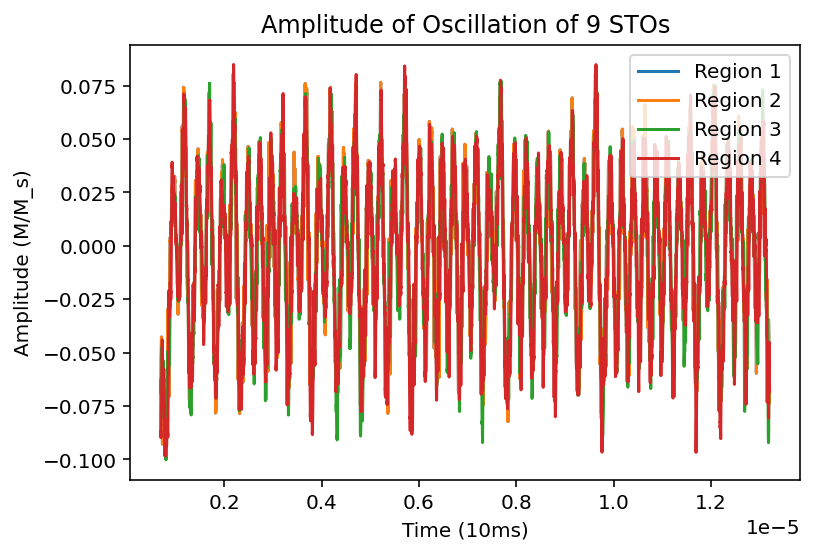

In [90]:
amp = []

for i in range(0, len(mag0)):
    amp.append(np.abs(signal.hilbert(mag0[i])))
    plt.plot(t, amp[i-1] - 0.35, label=f'Region {i+1}')
    
plt.legend(loc='upper right')
# plt.xlim(700e-9, 10000e-9)
# plt.ylim(-0.1, .07)

plt.title('Amplitude of Oscillation of 9 STOs')
plt.ylabel('Amplitude (M/M_s)')
plt.xlabel('Time (10ms)')


amp = np.array(amp)


In [91]:
amp1 = average_each_interval(amp, 5)
len(amp1[0])

2500

In [92]:
target = mackey_glass[0:2000]
target = target[1:] 
print(len(target))

1999


In [93]:
input = amp1[:, 0:len(target)]
print(input.shape)

(4, 1999)


In [94]:
regressor = linear_model.LinearRegression()
regressor.fit(input.T, target)
regressor.score(input.T, target)

0.20898584592612834

In [95]:
predictions = regressor.predict(input.T)

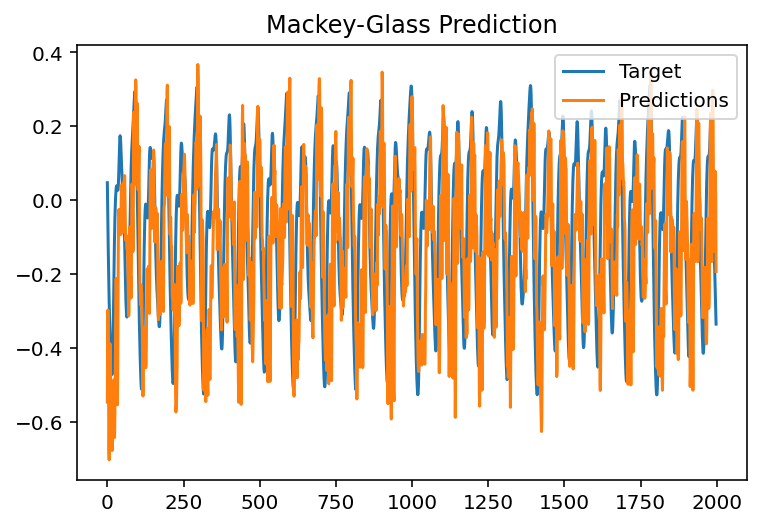

In [96]:
plt.plot(target, label='Target')
plt.plot(predictions*2, label='Predictions')
plt.legend(loc='upper right')

plt.title('Mackey-Glass Prediction')
plt.show()

In [97]:
mse_training = np.mean((target - predictions)**2)
print(mse_training)

0.03689898823056461


In [98]:
testing_input = amp1[:, 2000:2500-1]
print(testing_input.shape)

(4, 499)


In [99]:
testing_target = mackey_glass[2001:2500]
print(len(testing_target))

499


In [100]:
testing_prediction_ = regressor.predict(testing_input.T)
testing_predictions = np.array([0])
testing_predictions = np.append(testing_predictions, testing_prediction_)


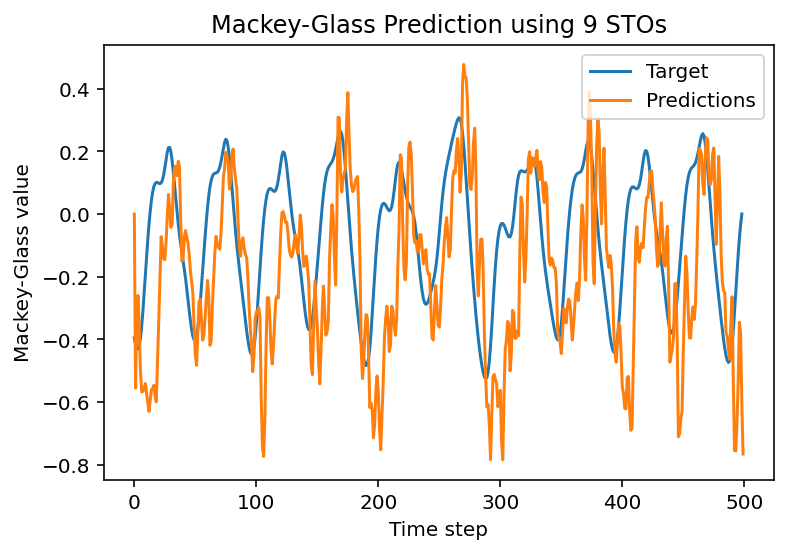

In [101]:
plt.plot(testing_target, label='Target')
plt.plot(testing_predictions*3, label='Predictions')
plt.legend(loc='upper right')
plt.title('Mackey-Glass Prediction using 9 STOs')
plt.ylabel('Mackey-Glass value')
plt.xlabel('Time step')
plt.show()

In [84]:
mse_testing = np.mean((testing_target - testing_predictions[1:])**2)
print(mse_testing)

0.03838410231965168


In [102]:
path = 'scripts/2.out'

In [103]:
split(splitext(path)[0])[1]

'2'